# Importing LIbraries

In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

# Importing Dataset

In [5]:
df = pd.read_csv('LDPD.csv',encoding= 'unicode_escape')

In [6]:
df.head(5)


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [7]:
print("\nColumns: ", df.columns)


Columns:  Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')


# EDA

In [9]:
# Mapping 'Male' to 1 and 'Female' to 0 in the 'Gender of the patient' column
df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 1, 'Female': 0})

# No liver disease then:=0 for having liver disease then:=1
df['Result'] = df['Result'].map({1: 1, 2: 0})

Number of patients that are male:  21986
Number of patients that are female:  7803


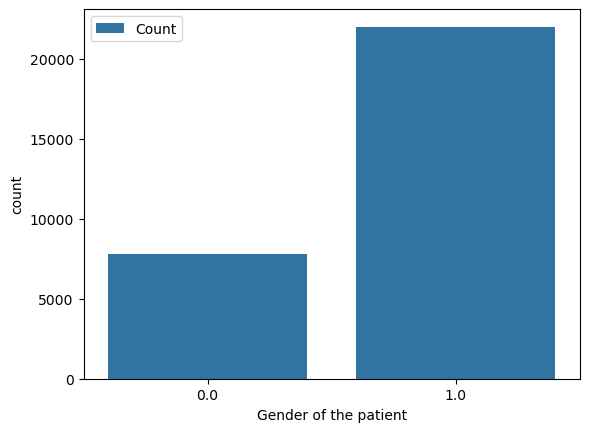

In [10]:
# Plotting the Number of Male and Female patients
sns.countplot(data=df, x = 'Gender of the patient', label='Count')

M, F = df['Gender of the patient'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

Number of patients diagnosed with liver disease:  21917
Number of patients not diagnosed with liver disease:  8774


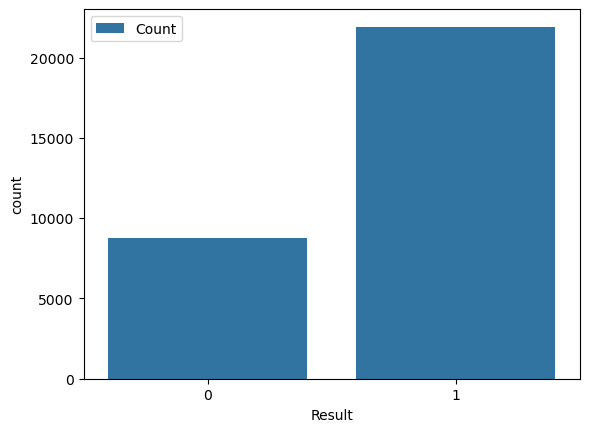

In [11]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
sns.countplot(data=df, x = 'Result', label='Count')

LD, NLD = df['Result'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

# Correlation

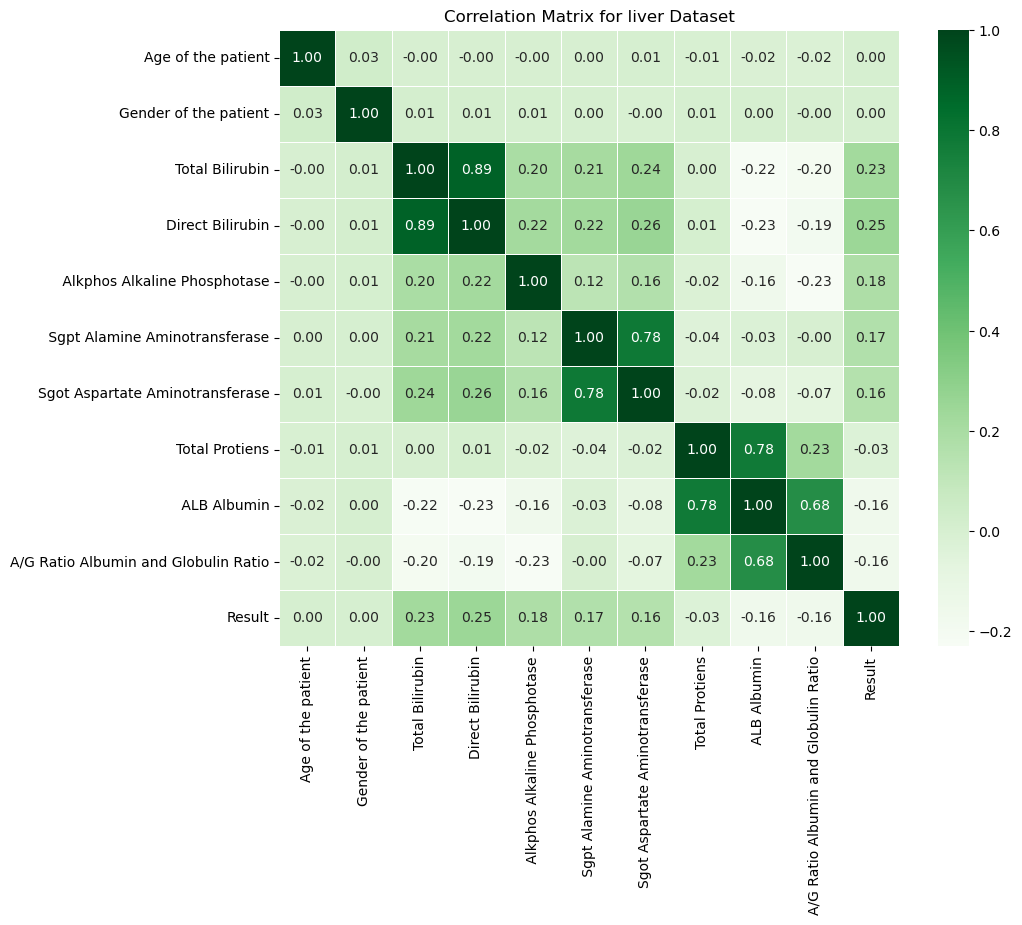

In [13]:
# Calculateing correlation matrix
corr_matrix = df.corr()

# Ploting the corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for liver Dataset")
plt.show()

In [14]:
#check for null value
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [15]:
df= df.dropna()
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [16]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16389 non-null  float64
 1   Gender of the patient                 16389 non-null  float64
 2   Total Bilirubin                       16389 non-null  float64
 3   Direct Bilirubin                      16389 non-null  float64
 4    Alkphos Alkaline Phosphotase         16389 non-null  float64
 5    Sgpt Alamine Aminotransferase        16389 non-null  float64
 6   Sgot Aspartate Aminotransferase       16389 non-null  float64
 7   Total Protiens                        16389 non-null  float64
 8    ALB Albumin                          16389 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16389 non-null  float64
 10  Result                                16389 non-null  int64  
dtypes: float64(10), int6

# Data Splitting

In [18]:
X = df.drop('Result', axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [19]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(13111, 10)
(13111,)
(3278, 10)
(3278,)


In [20]:
df.shape

(16389, 11)

# GRadient Boost

In [22]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)
print(classification_report(y_test, gb_model.predict(X_test)))

Gradient Boosting Accuracy: 0.9048200122025626
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       908
           1       0.89      0.99      0.94      2370

    accuracy                           0.90      3278
   macro avg       0.93      0.84      0.87      3278
weighted avg       0.91      0.90      0.90      3278



Text(0.5, 1.0, 'Confusion Matrix')

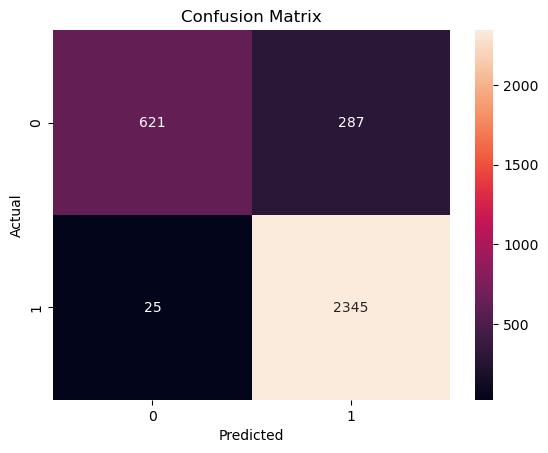

In [23]:
rf_predicted = gb_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)

ab_predictions = ab_model.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_predictions)
print("AdaBoost Accuracy:", ab_accuracy)
print(classification_report(y_test, ab_model.predict(X_test)))

AdaBoost Accuracy: 0.7226967663209274
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       908
           1       0.83      0.78      0.80      2370

    accuracy                           0.72      3278
   macro avg       0.66      0.68      0.67      3278
weighted avg       0.74      0.72      0.73      3278



Text(0.5, 1.0, 'Confusion Matrix')

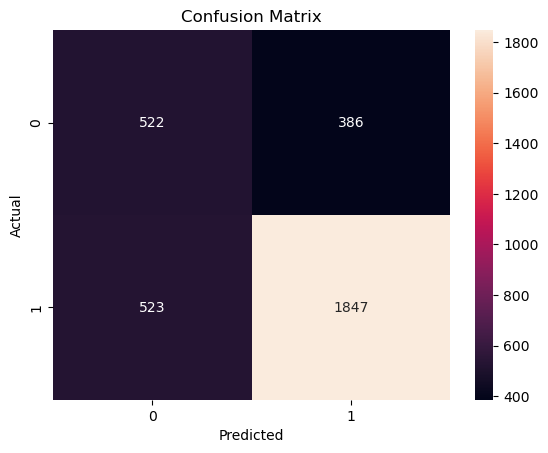

In [26]:
rf_predicted = ab_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# LogitBoost

In [28]:
import sklearn
print(sklearn.__version__)


1.6.0


In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the AdaBoost classifier with Logistic Regression as the base estimator
logit_boost_model = AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000))
logit_boost_model.fit(X_train, y_train)

# Predictions and evaluation
logit_boost_predictions = logit_boost_model.predict(X_test)
logit_boost_accuracy = accuracy_score(y_test, logit_boost_predictions)

print("Logit Boost Accuracy:", logit_boost_accuracy)
print(classification_report(y_test, logit_boost_predictions))


Logit Boost Accuracy: 0.7193410616229409
              precision    recall  f1-score   support

           0       0.42      0.04      0.07       908
           1       0.73      0.98      0.83      2370

    accuracy                           0.72      3278
   macro avg       0.57      0.51      0.45      3278
weighted avg       0.64      0.72      0.62      3278



Text(0.5, 1.0, 'Confusion Matrix')

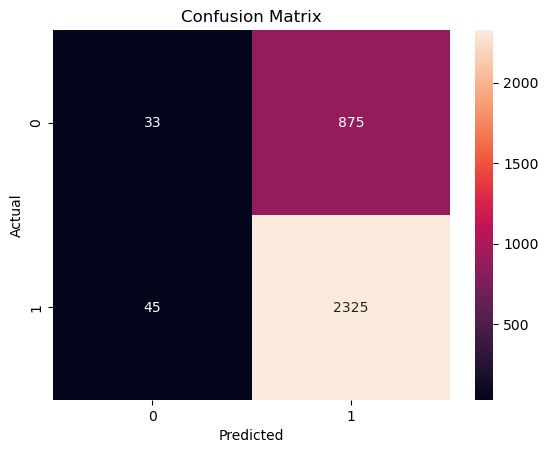

In [30]:
rf_predicted = logit_boost_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# SGBoost

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Instantiate the Gradient Boosting classifier with subsampling for stochastic boosting
sgb_model = GradientBoostingClassifier(subsample=0.8)
sgb_model.fit(X_train, y_train)
sgb_predictions = sgb_model.predict(X_test)
sgb_accuracy = accuracy_score(y_test, sgb_predictions)
print("Stochastic Gradient Boosting Accuracy:", sgb_accuracy)
print(classification_report(y_test, sgb_model.predict(X_test)))

Stochastic Gradient Boosting Accuracy: 0.9039048200122025
              precision    recall  f1-score   support

           0       0.95      0.69      0.80       908
           1       0.89      0.99      0.94      2370

    accuracy                           0.90      3278
   macro avg       0.92      0.84      0.87      3278
weighted avg       0.91      0.90      0.90      3278



Text(0.5, 1.0, 'Confusion Matrix')

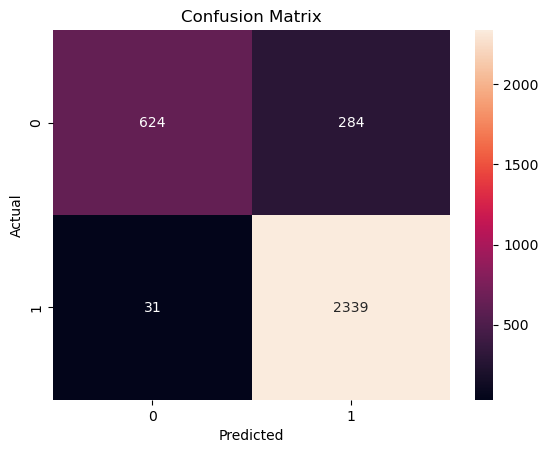

In [33]:
rf_predicted = sgb_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [64]:
#XGB Boost

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_predictions))


XGBoost Accuracy: 0.9993898718730934
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       908
           1       1.00      1.00      1.00      2370

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



Text(0.5, 1.0, 'Confusion Matrix')

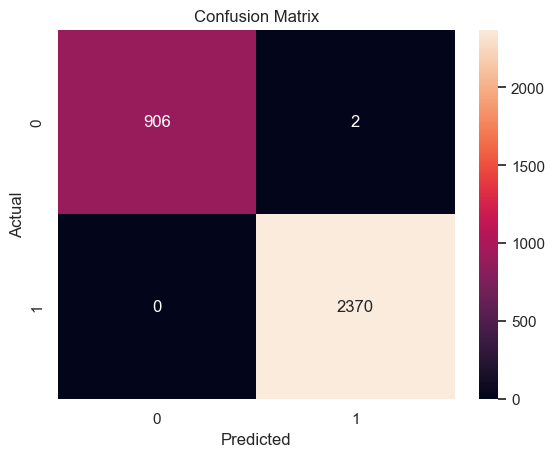

In [68]:
rf_predicted = xgb_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [70]:
#Logit GBM

In [92]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the LightGBM model
lgbm_model = LGBMClassifier(learning_rate=0.01)
lgbm_model.fit(X_train, y_train)

# Make predictions
lgbm_predictions = lgbm_model.predict(X_test)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
print("LightGBM Accuracy:", lgbm_accuracy)
print(classification_report(y_test, lgbm_predictions))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9380, number of negative: 3731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 13111, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.715430 -> initscore=0.921903
[LightGBM] [Info] Start training from score 0.921903
LightGBM Accuracy: 0.8794996949359365
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       908
           1       0.86      1.00      0.92      2370

    accuracy                           0.88      3278
   macro avg       0.93      0.78      0.82      3278
weighted avg       0.90      0.88      0.87      3278



Text(0.5, 1.0, 'Confusion Matrix')

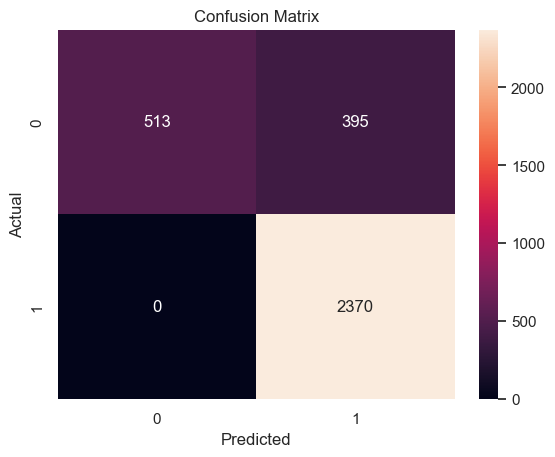

In [94]:
rf_predicted = lgbm_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [96]:
#cat Boost

In [98]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(learning_rate=0.01, verbose=0)  # Set verbose=0 to suppress training output
catboost_model.fit(X_train, y_train)

# Make predictions
catboost_predictions = catboost_model.predict(X_test)

# Evaluate the model
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)
print(classification_report(y_test, catboost_predictions))


CatBoost Accuracy: 0.9993898718730934
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       908
           1       1.00      1.00      1.00      2370

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



Text(0.5, 1.0, 'Confusion Matrix')

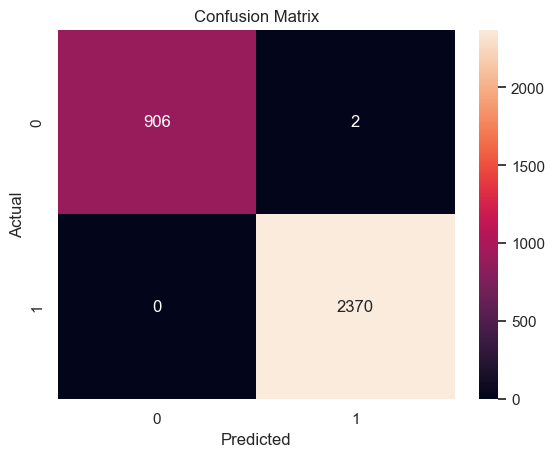

In [100]:
rf_predicted = catboost_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [102]:
import pandas as pd

accuracy_data = {
    'Model': ['Gradient Boosting', 'Adaptive Boosting', 'Logit Boosting',
              'SGBOOST','XGBoost','LightGbm','CatBoost'],
    'Accuracy': [ gb_accuracy,ab_accuracy,logit_boost_accuracy, sgb_accuracy,xgb_accuracy,lgbm_accuracy,catboost_accuracy]
}
accuracy_df = pd.DataFrame(accuracy_data)

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print(accuracy_df)

               Model  Accuracy
4            XGBoost  0.999390
6           CatBoost  0.999390
0  Gradient Boosting  0.904820
3            SGBOOST  0.903905
5           LightGbm  0.879500
1  Adaptive Boosting  0.722697
2     Logit Boosting  0.719341


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9752\3488166315.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x="Model", y="Accuracy", data=df, palette="Greens")


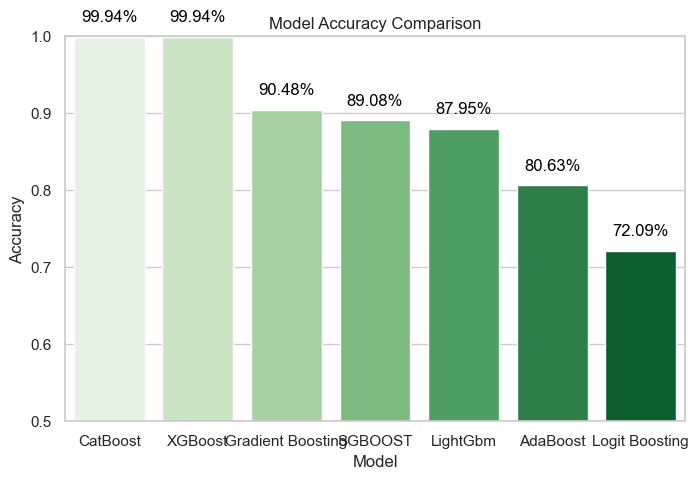

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    "Model": ["Gradient Boosting", "AdaBoost", "Logit Boosting", "SGBOOST","XGBoost","LightGbm","CatBoost"],
    "Accuracy": [0.904820,0.806284, 0.720866,0.890787,0.99938,0.879499,0.9993898]
}
df = pd.DataFrame(data)
df = df.sort_values(by="Accuracy", ascending=False)
# Set the style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8,5))
bars = sns.barplot(x="Model", y="Accuracy", data=df, palette="Greens")

# Add percentages on top of each bar
for i, acc in enumerate(df["Accuracy"]):
    bars.text(i, acc + 0.02, f"{acc * 100:.2f}%", ha="center", fontsize=12, color="black")

# Set labels and title
plt.ylim(0.5, 1)  # Adjust the y-axis range for better visibility
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

plt.show()
